In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dataset = '/content/drive/MyDrive/DATA/SUV_Purchase.csv'
df = pd.read_csv(dataset)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [ ]:
df.isnull().sum()
df.drop('User ID', axis = 1, inplace=True)


In [ ]:
X = df.drop(['Purchased'],axis=1)
Y = df[['Purchased']]
X
Y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_test

,Gender,Age,EstimatedSalary
201,1,49,74000
88,1,26,81000
77,0,22,27000
295,0,36,63000
66,1,24,19000
...,...,...,...
382,0,44,139000
301,1,48,74000
85,0,31,118000
221,1,35,91000


In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()
X_train = sst.fit_transform(X_train)
X_test = sst.transform(X_test)
X_test

array([[ 1.06458129,  1.06320852,  0.09966807],
       [ 1.06458129, -1.14605594,  0.30696284],
       [-0.93933644, -1.53027584, -1.29216825],
       [-0.93933644, -0.18550617, -0.22608086],
       [ 1.06458129, -1.33816589, -1.52907656],
       [-0.93933644,  1.92770331, -0.96641932],
       [ 1.06458129, -0.95394599,  0.54387115],
       [ 1.06458129, -0.28156115,  0.07005453],
       [ 1.06458129, -0.4736711 , -1.17371409],
       [ 1.06458129, -1.14605594,  0.2773493 ],
       [-0.93933644,  1.35137345, -0.96641932],
       [ 1.06458129,  0.96715354,  2.08377515],
       [ 1.06458129,  0.77504359, -0.34453501],
       [ 1.06458129, -1.14605594, -1.61791717],
       [ 1.06458129, -0.56972608, -1.5586901 ],
       [ 1.06458129, -0.76183603, -0.6406704 ],
       [-0.93933644, -1.43422087, -0.13724024],
       [ 1.06458129, -0.66578106,  0.09966807],
       [-0.93933644,  0.10265876,  0.1292816 ],
       [ 1.06458129, -0.66578106, -0.37414855],
       [-0.93933644, -0.4736711 , -0.314

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
#For best k values
neighbors = np.arange(1,20) #array and initialize it with 1 , 20 values
overall_accuracy = np.empty(len(neighbors))
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
  knn_clf = KNeighborsClassifier(n_neighbors = k)
  knn_clf.fit(X_train, Y_train)

  #training accuracy
  train_accuracy[i] = knn_clf.score(X_train, Y_train)

  #testing accuracy
  test_accuracy[i] = knn_clf.score(X_test, Y_test)

  #overall accuracy
  overall_accuracy[i] = knn_clf.score(sst.transform(X),Y)

#Generate plots for best k value

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

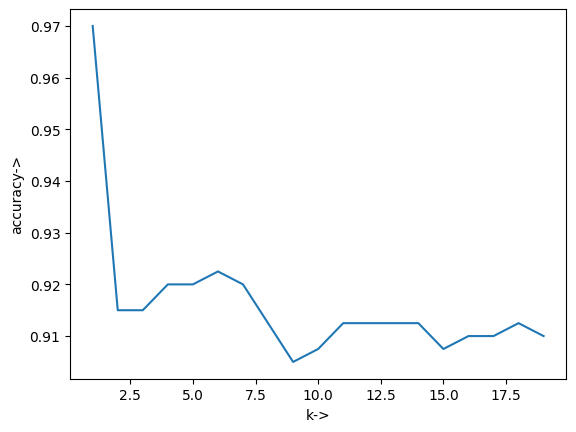

In [ ]:
plt.plot(neighbors, overall_accuracy, label="Overall Accuracy")

plt.xlabel('k->')
plt.ylabel('accuracy->')

plt.show()


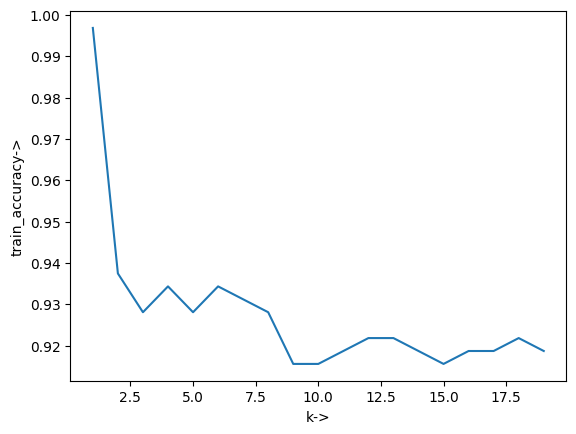

In [ ]:
plt.plot(neighbors, train_accuracy,label="Train accuracy")

plt.xlabel('k->')
plt.ylabel('train_accuracy->')

plt.show()

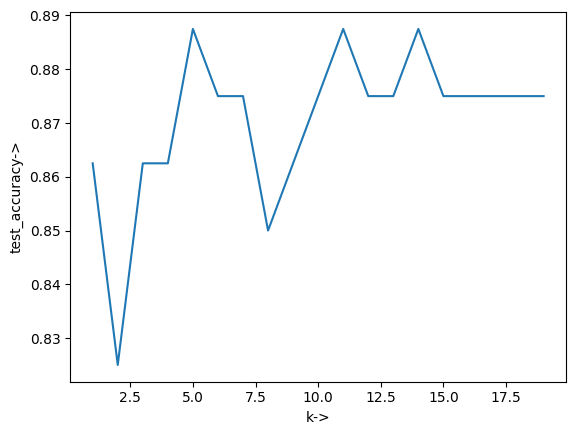

In [ ]:
plt.plot(neighbors, test_accuracy, label="Test accuracy")

plt.xlabel('k->')
plt.ylabel('test_accuracy->')

plt.show()

Selected value of k is 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 6)
knn_clf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [ ]:
knn_clf.score(X_train, Y_train) * 100

93.4375

In [ ]:
knn_clf.score(sst.transform(X),Y) * 100

92.25

In [ ]:
knn_clf.score(X_test, Y_test) * 100

87.5